## Imports

In [825]:
import pandas as pd
import numpy as np
from psaw import PushshiftAPI
import datetime 
from bs4 import BeautifulSoup 
import requests
import re
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Enter City (Emphasis on city) where natural disaster occured

In [826]:
searchcity = 'MD'

## Creates a list of URLS to search through

In [827]:
url_list=[]
for page in range(1,500):
    url_list.append("https://api.adzuna.com:443/v1/api/jobs/us/search/"+ str(page) +"?app_id=d3330ea8&app_key=cbcbe79274381fae5af07fb6828067ce&results_per_page=100&where="+str(searchcity)+"&sort_direction=up&sort_by=date")

## Starts pulling data from Adunza API for jobs

In [828]:
spot = 0
pulleddata = []
for url in url_list:
        try: 
            requests.get(url).json()['results'][0]
        pulleddata.append(requests.get(url).json())
        print(str(spot) + ' missisipi')
        spot += 1
        time.sleep(.5)
    except: 
        print('This is the end of data')
        break
        

0 missisipi
1 missisipi
2 missisipi
3 missisipi
4 missisipi
5 missisipi
6 missisipi
7 missisipi
8 missisipi
9 missisipi
10 missisipi
11 missisipi
This is the end of data


## Structures data 

In [829]:
structureddata = []
for x in range(0, len(pulleddata)):
    for y in pulleddata[x]['results']:
        structureddata.append(y)

In [830]:
structureddata[10]['company']['display_name']

'Cardinal Health, Inc.'

## Creates Dataframe and creates a saved file (in case of "oopsies")

In [831]:
df = pd.DataFrame()
try:
    df['company'] = [structureddata[x]['company']['display_name'] for x in range(0, len(structureddata))]
    df['date'] = [structureddata[x]['created'][0:7] for x in range(0, len(structureddata))]
    df['title']= [structureddata[x]['title']for x in range(0, len(structureddata))]
    df['salary']= [structureddata[x]['salary_is_predicted']for x in range(0, len(structureddata))]
    df['All_Sectors']= [structureddata[x]['category']['label']for x in range(0, len(structureddata))]
except:
    pass

df.drop_duplicates(inplace=True)

## Null (all should be 0)

In [832]:
df.isnull().sum()

company        0
date           0
title          0
salary         0
All_Sectors    0
dtype: int64

## Number of Data Points

In [833]:
len(df)

525

## Frequency of posting by dates (Should be "evenly" distributed)

In [834]:
df['date'].value_counts().head(10)

2018-09    327
2019-01     92
2018-12     59
2018-11     21
2018-10     19
2018-07      4
2018-06      2
2018-08      1
Name: date, dtype: int64

## Most common Sectors posted

In [835]:
df['All_Sectors'].value_counts()

Healthcare & Nursing Jobs           359
Unknown                              91
PR, Advertising & Marketing Jobs     27
Social work Jobs                     15
IT Jobs                              12
Logistics & Warehouse Jobs            6
Accounting & Finance Jobs             4
Sales Jobs                            3
Retail Jobs                           2
Consultancy Jobs                      1
Admin Jobs                            1
Scientific & QA Jobs                  1
Other/General Jobs                    1
HR & Recruitment Jobs                 1
Legal Jobs                            1
Name: All_Sectors, dtype: int64

## Industry Dummyvariable DataFrame

In [836]:
industrygraphs = pd.get_dummies(df['All_Sectors'])
industry = pd.concat([df, industrygraphs], axis=1)
for x in industry.columns[5:]:
    print(x)

Accounting & Finance Jobs
Admin Jobs
Consultancy Jobs
HR & Recruitment Jobs
Healthcare & Nursing Jobs
IT Jobs
Legal Jobs
Logistics & Warehouse Jobs
Other/General Jobs
PR, Advertising & Marketing Jobs
Retail Jobs
Sales Jobs
Scientific & QA Jobs
Social work Jobs
Unknown


## Saves Dataframe (with dummies, to cityname.csv)

In [837]:
industry.to_csv(str(searchcity)+'.csv')

## Frequency of posts 

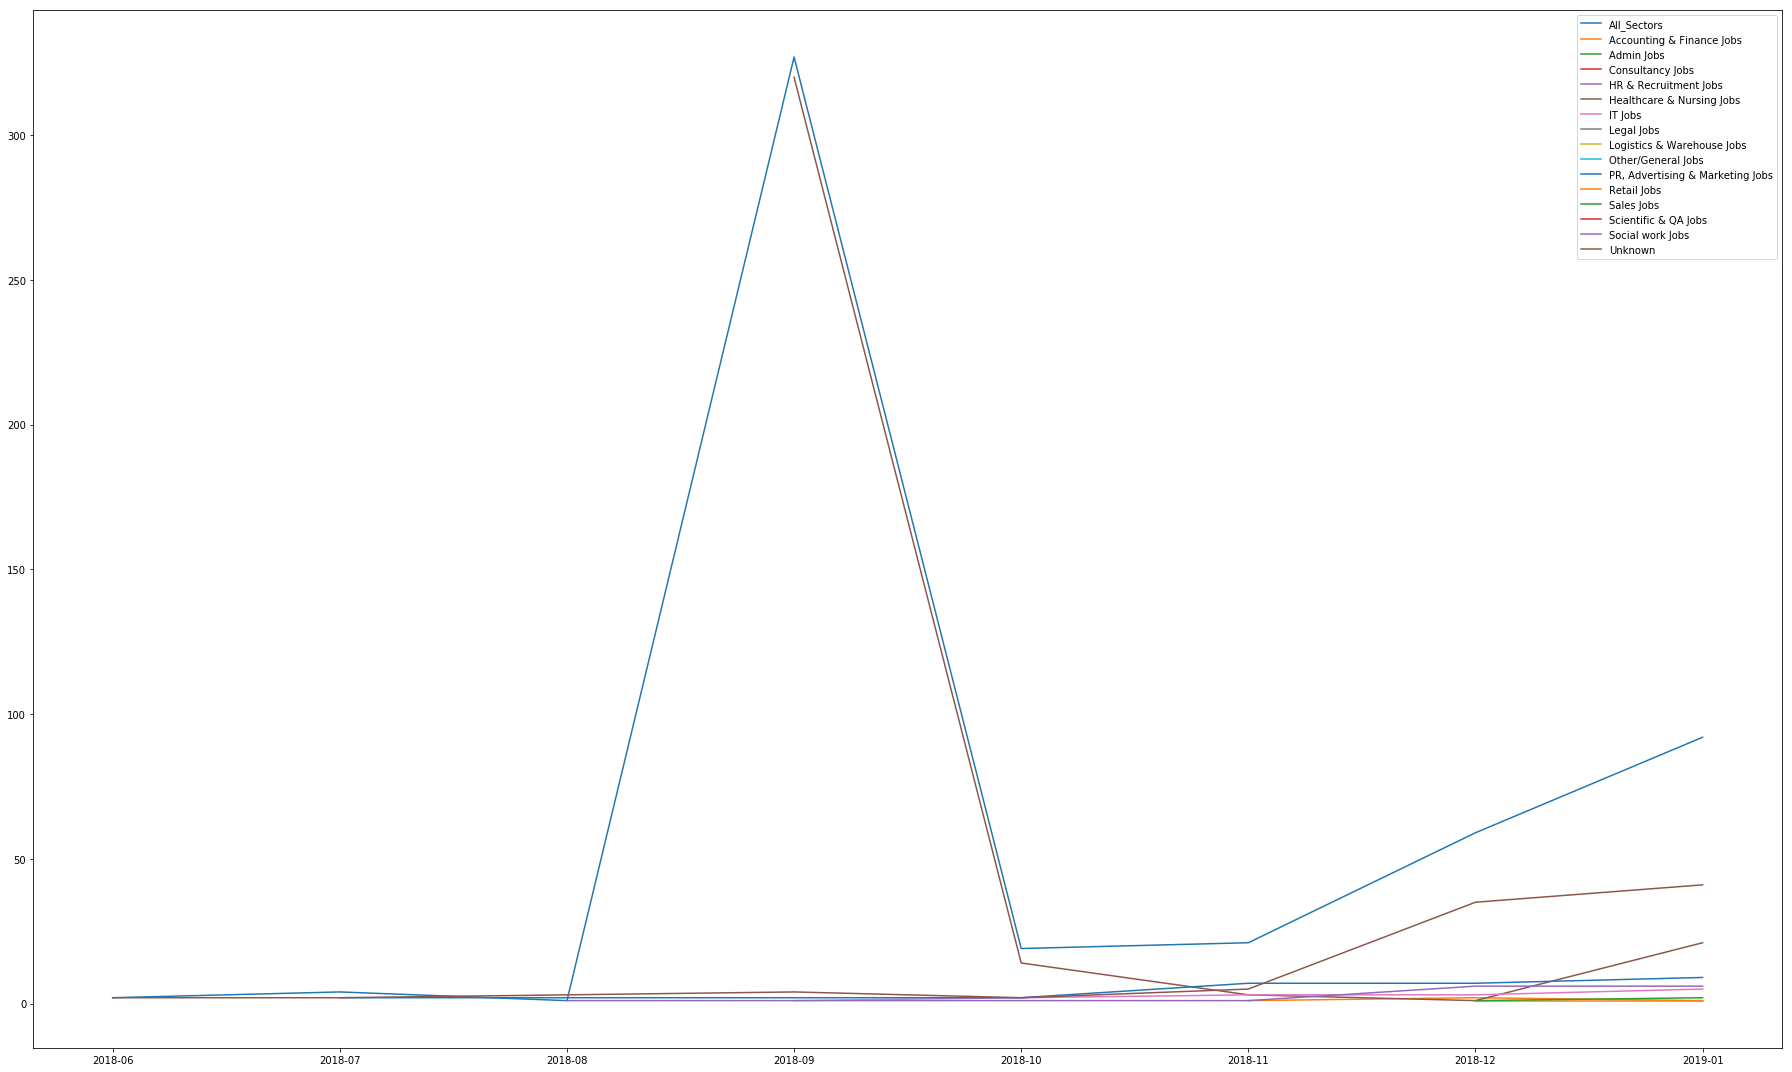

In [838]:
plt.figure(figsize=(25,15))
ax = sns.lineplot(data = df['date'].sort_index().value_counts()) 
for x in industry.columns[5:]:
    sns.lineplot(data = industry[industry[x] == 1]['date'].sort_index().value_counts())
plt.legend(labels=industry.columns[4:])
plt.tight_layout()
plt.savefig(str(searchcity)+".jpg")